In [1]:
%%HTML
<script src="require.js"></script>

In [2]:
# HTML code to toggle code cell visibility
from IPython.display import HTML
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/
jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="
javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')

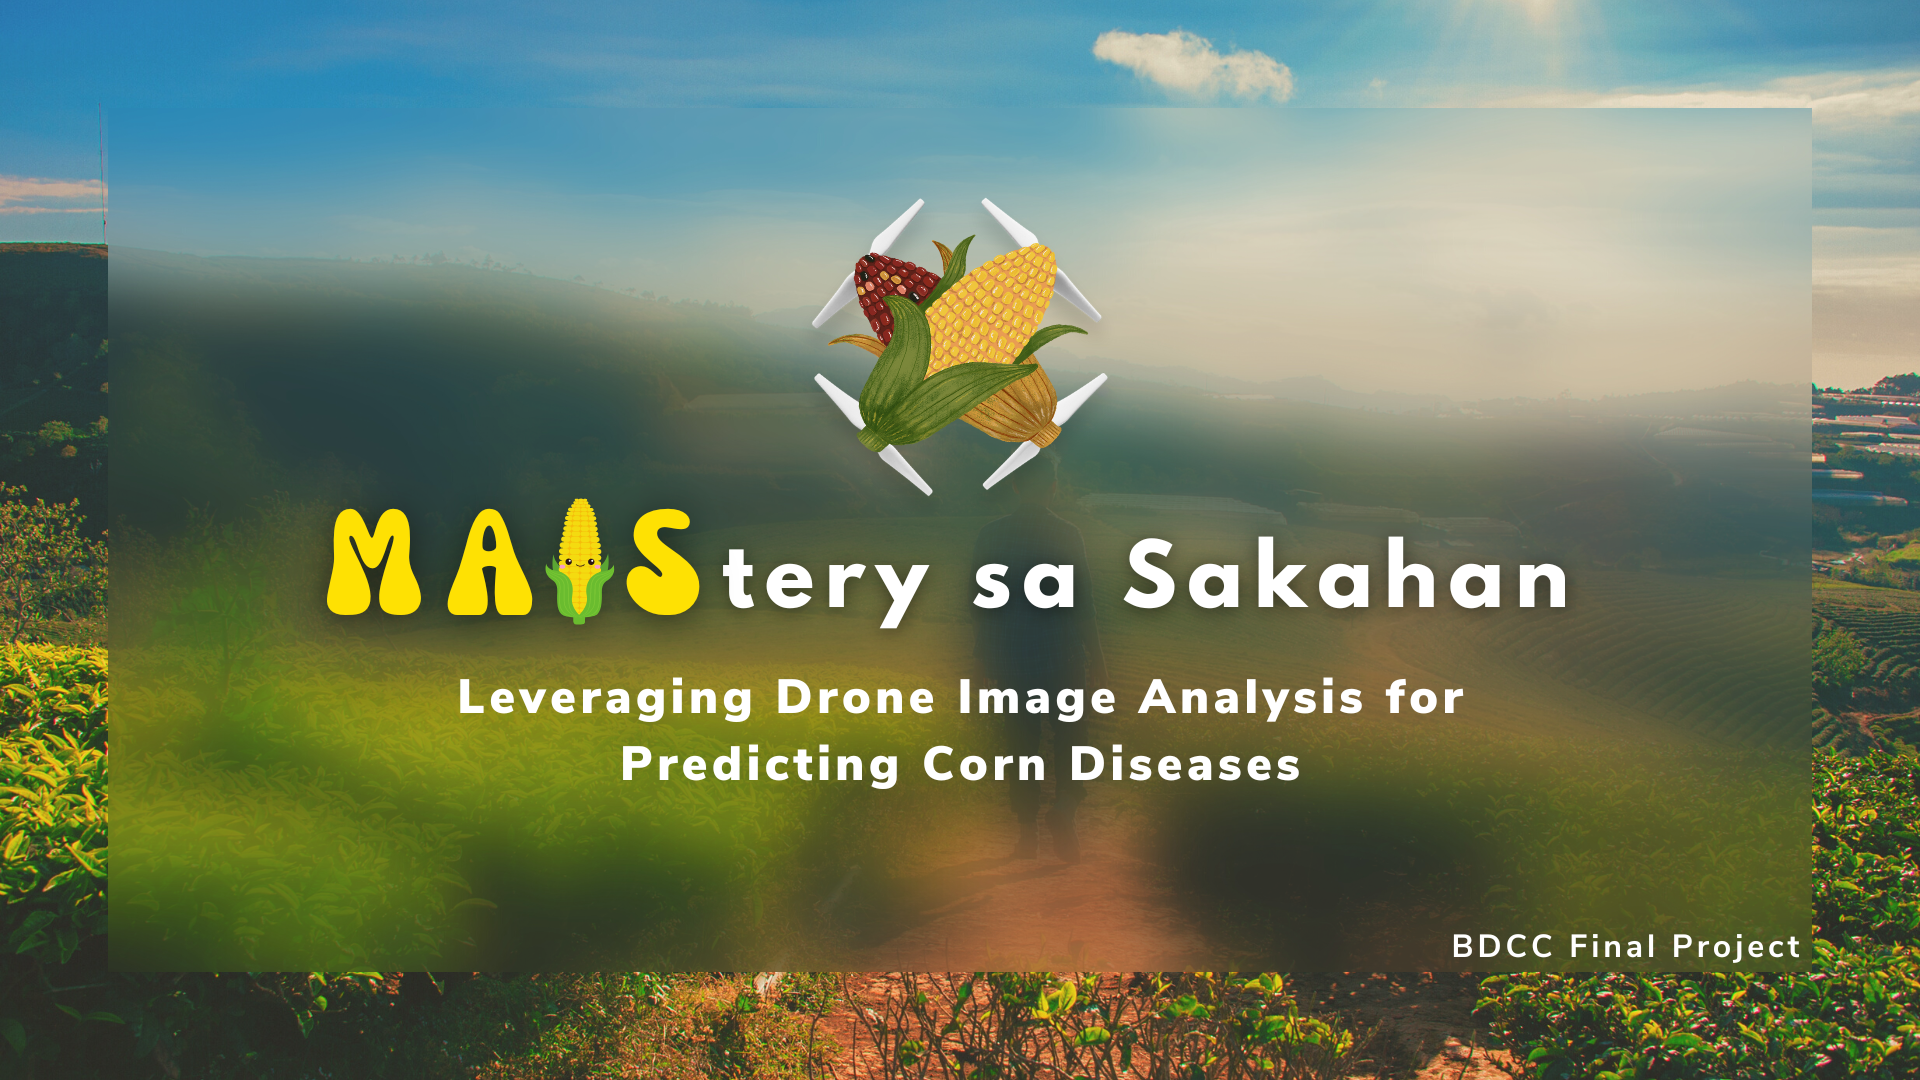

--- 
<a id='ExecSum'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">EXECUTIVE SUMMARY</h1>

The agricultural sector is a cornerstone of the Philippine economy, with corn holding the status of the second most important crop after rice. Serving as a principal source of livelihood for one-third of Filipino farmers (approximately 1.8 million), around 10 million hectares of land in the Philippines is dedicated to corn farming [(Gerpacio et al., 2004)](#crop). Yet, this vital crop is under threat due to the <b><span style="color:#AC2319">Northern Leaf Blight (NLB)</span></b>, an infectious disease caused by the fungus Setosphaeria turcica (also known as Exserohilum turcicum) [(Crop Protection Network, n.d.)](#nlb). The NLB disease is marked by large necrotic lesions on the leaves of the corn plants and has the potential to cause yield losses of 30-50% [(University of Delaware, n.d.)](#loss). Recognizing this alarming situation prompts an urgent need to explore a solution. Consequently, this study is designed to answer: <b><span style="color:#487307">How can machine learning models contribute to improving corn yield by facilitating the early and precise detection of diseases in corn crops?</span></b>

This investigation focuses on the development of a machine learning model for the early detection and diagnosis of the NLB disease using drone-captured images of corn fields. The aim is to leverage technology to protect the economic significance of corn to the Filipino economy and the livelihoods of Filipino farmers.

The methodology follows a four-step process: data collection, preprocessing, exploratory data analysis, and binary classification. Drone-captured images of corn fields are collected and processed to standardize input for the machine learning model, before being subjected to visual inspection, balancing techniques, and quality assessment. The model developed for this study uses a Multilayer Perceptron (MLP) for binary classification of healthy and sick corn plants.

The MLP model performed commendably, achieving an accuracy of <b>71.27%</b>, which exceeded the Proportional Chance Criterion benchmark of 62.5%. It demonstrated high precision, recall, and F1-score, with recall being the most critical metric due to the importance of correctly identifying sick plants for timely intervention. The confusion matrix, however, showed some room for improvement in minimizing false negatives and positives.

Despite these promising results, the study has inherent assumptions and limitations related to the quality and accuracy of the drone-captured images and the specific environmental conditions under which the data was collected. The model is also limited to binary classification and does not account for different stages or severity of the disease.

Recommendations for immediate implementation include deploying the model in controlled testing environments, integrating it into a mobile application for ease of use, implementing user education programs, forming partnerships for wider reach, enhancing data collection practices, improving model performance, incorporating additional features, and tailoring training for users.

Strategic actions for future work involve expanding the dataset, incorporating additional variables for a holistic approach to yield improvement, integrating IoT-based sensors for real-time data, developing predictive models for proactive disease management, conducting regular impact evaluations, investing in drone technology for improved image quality, collaborating with experts for better insights, and exploring advanced machine learning techniques. These recommendations, when implemented, are expected to have a significant impact on corn yields in the Philippines by allowing for the early detection and management of NLB disease.

---

<a id='TContents'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">TABLE OF CONTENTS</h1>

- [<span style="color:#487307">EXECUTIVE SUMMARY</span>](#ExecSum)
- [<span style="color:#487307">LIBRARIES & FUNCTIONS</span>](#Libraries)
1. [<span style="color:#487307">PROBLEM STATEMENT</span>](#Problem)
1. [<span style="color:#487307">MOTIVATION</span>](#Motivation)
1. [<span style="color:#487307">METHODOLOGY</span>](#Methodology)
1. [<span style="color:#487307">DATA COLLECTION</span>](#Collection) 
    1. [<span style="color:#487307">Data Source</span>](#Source)
    1. [<span style="color:#487307">Data Description</span>](#Description)
    1. [<span style="color:#487307">Data Collection</span>](#Collect)
1. [<span style="color:#487307">DATA PREPROCESSING</span>](#Prepare)
1. [<span style="color:#487307">EXPLORATORY DATA ANALYSIS</span>](#Analytics)
1. [<span style="color:#487307">BINARY CLASSIFICATION</span>](#Classification)
1. [<span style="color:#487307">RESULTS AND DISCUSSION</span>](#Results)
1. [<span style="color:#487307">CONCLUSION</span>](#Conclusion)
1. [<span style="color:#487307">RECOMMENDATION</span>](#Recommendation)
    1. [<span style="color:#487307">Limitations of the Study</span>](#Limitations)
    1. [<span style="color:#487307">Recommendation</span>](#Recommendation2)
    1. [<span style="color:#487307">Future Work</span>](#FutureWork)
- [<span style="color:#487307">REFERENCES</span>](#References)

---

<h2 style="color:#487307; font-size:26px;">List of Tables</h2>

- Table 1. Methodology Details 
- Table 2. Data Source
- Table 3. Data Description of Features Used

---

<h2 style="color:#487307; font-size:26px;">List of Figures</h2>

- Figure 1. Methodology
- Figure 2. Preprocessing Steps
- Figure 3. Sample Maize Images
- Figure 4. Drone Maize Images Distribution (Before RandomUnderSampling)
- Figure 5. Drone Maize Images Distribution (After RandomUnderSampling)

---

<a id='Libraries'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">LIBRARIES AND FUNCTIONS</h1>

This section establishes the initial steps for the subsequent analysis by importing the necessary libraries and defining the required functions, including global libraries and helper functions. These libraries and functions serve as the foundation for the analysis process.

---

<h2 style="color:#487307; font-size:26px;">Global Libraries</h2>

In [3]:
# Import Libraries and modules
import os
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import warnings
from pyspark.sql import DataFrame
from pyspark.sql.functions import col, when, udf, rand
from pyspark.sql.functions import pandas_udf, input_file_name
from pyspark.sql.types import StringType, DoubleType
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import expr
from sklearn.metrics import confusion_matrix as cm


# Global settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


# Hide warnings
warnings.filterwarnings("ignore")


# Global variables
c_red = '#AC2319'
c_blue = '#396ec1'
c_green = '#487307'
c_lightgreen = '#6cbd2f'
c_yellow = '#fee103'

# r,b,g,lg,y
custom_colors = ['#FF8480', '#82A8F3', '#92D74F', '#A8F57C', '#FFEF7F'] 
c_greens = plt.get_cmap('Greens')(np.linspace(0.30, 0.90, 10))
c_reds = plt.get_cmap('Reds')(np.linspace(0.10, 1, 10))

---

<h2 style="color:#487307; font-size:26px;">Helper Functions</h2>

In [4]:
# Define Global Helper Functions
# Move to helper functions
def preprocess_images(pyspark_dataframe_images):
    """Preprocess images from PySpark DataFrame, convert images to grayscale, 
    resize, and transform images into flattened numpy arrays.
    
    Args:
        pyspark_dataframe_images: Input PySpark DataFrame containing 
        image file paths.

    Returns:
        preprocessed_images_df: Output PySpark DataFrame with 
        preprocessed image vectors and filenames.
    """

    # Convert image file paths into preprocessed image vectors
    def image_processing(file_paths: pd.Series) -> pd.Series:
        """Returns a series of image vectors as strings after performing a
        series of transformations, including resizing the images, converting 
        them images to grayscale, converting them to numpy arrays, and 
        finally flattening them into vectors.
        """
        # Initialize an empty list to store the preprocessed image vectors
        image_vectors = []
        
        # Iterate over each file path in the input Series
        for file_path in file_paths:
            # Open the image file and resize it
            img = Image.open(file_path)
            img = img.resize((25, 25))
            
            # Convert the resized image to grayscale
            grayscale_image = img.convert('L')
            
            # Convert the grayscale image to a flat numpy array (image vector)
            image_vector = np.array(grayscale_image).flatten()
            
            # Convert the image vector into a string and add it to the list
            image_vector_string = ','.join(map(str, image_vector))
            image_vectors.append(image_vector_string)
        
        # Return the image vectors as a pandas Series
        return pd.Series(image_vectors)
  
    # Define a pandas UDF using the image_processing function
    preprocess_images_udf = pandas_udf(image_processing, StringType())

    # Apply the UDF to the 'file_path' column of the input DataFrame to 
    # create the 'image_vector' column
    pyspark_dataframe_images = (
        pyspark_dataframe_images
        .withColumn(
            'image_vector',
            preprocess_images_udf(
                pyspark_dataframe_images['file_path'])))

    # Rename the 'file_path' column to 'image' to match the CSV DataFrame
    pyspark_dataframe_images = (pyspark_dataframe_images
                                .withColumnRenamed('file_path', 'image'))

    # Define a UDF to extract the filename from a file path
    get_filename_udf = udf(lambda file_path: os.path.basename(file_path), 
                           StringType())
    
    # Apply the get_filename_udf to the 'image' column of the DataFrame to 
    # create the 'filename' column
    preprocessed_images_df = (
        pyspark_dataframe_images
        .withColumn(
            'filename', 
            get_filename_udf(pyspark_dataframe_images['image'])))
    
    # Return the preprocessed DataFrame
    return preprocessed_images_df


# Define a function to parse a vector string into a DenseVector
def parse_vector(vector_string):
    """Takes a string of comma-separated values, splits this string on the 
    commas, convert each resulting substring to a float,and then packages 
    these floating point values into a DenseVector (an object provided by 
    PySpark's MLlib library for local vectors, stored on a single machine, 
    as opposed to distributed vectors).
    """
    return Vectors.dense([float(num) for num in vector_string.split(",")])

# Create a UDF using the parse_vector function which will return a 
# a VectorUDT (which means returning a Vector data type)
parse_vector_udf = udf(parse_vector, VectorUDT())


def perform_basic_eda(df):
    """Perform Basic Exploratory Data Analysis on a DataFrame."""
    
    # Checking for Missing or Null Values
    display(HTML(f"<b>Missing or Null Values:</b>"))
    display(df.isnull().sum())

    # Summary Statistics
    display(HTML(f"<b>Summary Statistics:</b>"))
    display(df.describe())


def visual_inspection(df, sample_size):
    """Function to visually inspect a sample of images from the DataFrame.

    Args:
    df: DataFrame containing the image data.
    sample_size: Number of images to display.
    """
    sample_images = (df
                     .select('image')
                     .sample(False, 1.0)
                     .limit(sample_size)
                     .collect())
    random.shuffle(sample_images)

    # Calculate the number of rows required
    rows = math.ceil(sample_size / 5)  
    
    # Adjust the figure size based on the number of rows
    fig = plt.figure(figsize=(15, 3 * rows))  

    for i, row in enumerate(sample_images):
        img = Image.open(row.image)
        fig.add_subplot(rows, 5, i+1)  # Set the number of columns to 5
        plt.imshow(img)
        plt.axis('off')  # Remove axis tickmarks

    plt.tight_layout()
    plt.show()
    
    
def class_distribution(df, target_column):
    """Function to check the class distribution in the DataFrame.
    
    Args:
    df: DataFrame containing the image data.
    target_column: Name of the column containing the target classes.
    """
    df.groupBy(target_column).count().show()


def plot_distribution_spark(distribution: list, status: str):
    """Function to plot the distribution of the target column.

    Args:
    distribution: list of Rows containing target and count columns.
    """
    # Extract labels and counts from the distribution
    labels = [row['target'] for row in distribution]
    counts = [row['count'] for row in distribution]
    
    # Create a bar plot
    plt.figure(figsize=(15,10))
    plt.bar(labels, counts, color=['#AC2319', '#487307'])

    # Add labels and title
    plt.xlabel('Classification', fontsize=16, weight='bold')
    plt.ylabel('Count', fontsize=16, weight='bold')
    plt.xticks(labels, ['Sick', 'Healthy'], fontsize=16)
    plt.title(f'Drone Maize Images Distribution ({status} '
              f'RandomUnderSampling)',
              fontsize=24, weight='bold')

    # Display the plot
    plt.show()


def perform_random_undersampling(dataframe: DataFrame, 
                                 target_column: str) -> DataFrame:
    """
    Function to perform random undersampling on a DataFrame based on a 
    specified target column.

    Args:
    dataframe: DataFrame to perform undersampling on.
    target_column: Name of the target column used for class imbalance.

    Returns:
    DataFrame: Undersampled DataFrame with balanced classes.
    """
    # Split the data into majority and minority classes
    minority_dataframe = dataframe.filter(col(target_column) == 0)
    majority_dataframe = dataframe.filter(col(target_column) == 1)

    # Get the count of the minority class
    minority_class_count = minority_dataframe.count()

    # Sort the majority DataFrame 
    majority_dataframe = majority_dataframe.orderBy(rand(seed=10053))

    # Take the top N rows from the sorted majority class dataframe, 
    # where N is the count of the minority class
    undersampled_majority_dataframe = (majority_dataframe
                                       .limit(minority_class_count))

    # Combine the undersampled majority DataFrame with the minority DataFrame
    balanced_dataframe = (minority_dataframe
                          .unionAll(undersampled_majority_dataframe))

    return balanced_dataframe


def perform_classification(balanced_dataframe):
    """Performs the steps required for binary classification. This includes 
    splitting the data, vector assembly, defining and training the MLP 
    classifier, making predictions, and evaluating the model.

    Args:
    balanced_dataframe: The balanced DataFrame on which to perform the 
    classification.
    """
    # Split the data into training and test sets
    display(HTML(f"<b>Train-Test split: 70%-30%</b>"))
    training_data, testing_data = final_dataframe.randomSplit([0.7, 0.3], 
                                                              seed=10053)

    # Define the VectorAssembler
    vector_assembler = VectorAssembler(inputCols=['image_vector'], 
                                       outputCol='features')

    # Transform the data
    training_data = vector_assembler.transform(training_data)
    testing_data = vector_assembler.transform(testing_data)

    # Drop the 'image_vector' column from training_data
    training_data = training_data.drop('image_vector')

    # Define the MLP classifier
    layers = [training_data.select('features').first()[0].size, 128, 64, 2]
    mlp_classifier = MultilayerPerceptronClassifier(featuresCol='features', 
                                                    labelCol='target', 
                                                    layers=layers,
                                                    seed=10053)

    # Train the MLP model
    mlp_model = mlp_classifier.fit(training_data)

    # Make predictions on the test data
    predictions = mlp_model.transform(testing_data)

    # Define MulticlassClassificationEvaluator
    evaluator = MulticlassClassificationEvaluator(labelCol='target', 
                                                  predictionCol='prediction')

    display(HTML(f"<b>Displaying test results:</b>"))
    # Evaluate the model for accuracy, precision, recall, and F1-Score
    metrics = {'accuracy': 'accuracy', 'precision': 'weightedPrecision', 
               'recall': 'weightedRecall', 'f1': 'f1'}
    for metric, metricName in metrics.items():
        value = evaluator.evaluate(predictions, 
                                   {evaluator.metricName: metricName})
        display(HTML(f"<b>{metric.capitalize()}: {value:.2%}</b>"))

    # Calculate true positive count for each class
    tp_counts = (predictions
                 .groupBy('target', 'prediction')
                 .count()
                 .where(expr('target = prediction')))

    # Pivot the DataFrame to get the true positive count for each class
    confusion_matrix = (tp_counts
                        .groupBy('target')
                        .pivot('prediction')
                        .sum('count')
                        .na.fill(0))
    display(HTML(f"<b>Confusion Matrix:</b>"))
    display(confusion_matrix.show())

    # Extract the true labels and predicted labels from the DataFrame
    true_labels = (predictions
                   .select('target')
                   .rdd.flatMap(lambda x: x)
                   .collect())
    predicted_labels = (predictions
                        .select('prediction')
                        .rdd.flatMap(lambda x: x)
                        .collect())

    # Create the confusion matrix using sklearn
    confusion = cm(true_labels, predicted_labels, normalize='all')

    # Define classes
    classes = (balanced_dataframe.select('target')
               .distinct().rdd.flatMap(lambda x: x).collect())

    # Plot the confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(confusion, cmap='RdYlGn')
    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            # Format the confusion matrix values to 2 decimal place %s
            ax.text(j, i, f"{confusion[i, j]*100:.2f}%", ha='center', 
                    va='center', 
                    color='black', weight='bold')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)
    plt.colorbar(im)
    plt.show()


    # Calculate Proportional Chance Criterion (PCC)
    target_1 = (balanced_dataframe
                .filter(balanced_dataframe.target == 1)
                .count())
    target_0 = (balanced_dataframe
                .filter(balanced_dataframe.target == 0)
                .count())
    pcc = ((target_1/balanced_dataframe.count())**2 + 
           (target_0/balanced_dataframe.count())**2)
    pcc_125 = pcc * 1.25
    display(HTML(f"<b>PCC * 1.25: {pcc_125:.2%}</b>"))

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Problem'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">1. PROBLEM STATEMENT</h1>

The agricultural sector plays a crucial role in the Philippines, with corn being the second most important crop after rice. It serves as a major source of livelihood for one-third of Filipino farmers (1.8 million), with about 10 million hectares dedicated to corn farming [(Gerpacio et al., 2004)](#crop). However, corn crops are significantly affected by the <b><span style="color:#AC2319">Northern Leaf Blight (NLB)</span></b>, an infectious disease caused by the fungus Setosphaeria turcica (also known as Exserohilum turcicum) [(Crop Protection Network, n.d.)](#nlb). This disease is characterized by large necrotic lesions on leaves and accounts for a potential yield loss of 30-50% [(University of Delaware, n.d.)](#loss). 

Given these facts, the central question that needs to be answered is:

<b><span style="color:#487307">How can machine learning models contribute to improved corn yield by enabling early and accurate detection of diseases in corn crops?</span></b>

Leveraging a large dataset of drone-captured corn field images, we can train machine learning algorithms to recognize and distinguish <b><span style="color:#487307">healthy</span></b> corn plants from those affected by NLB. With this capability, we can ensure timely and accurate detection, enabling immediate interventions and ultimately leading to improved corn yield.

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Motivation'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">2. MOTIVATION</h1>

Corn, being a vital crop in the Philippines, holds a significant economic value, and any loss due to diseases like NLB translates to substantial economic damage. Furthermore, corn farming provides a livelihood to a substantial number of Filipino farmers, making it necessary to ensure optimal crop yield.

The use of machine learning for early detection and diagnosis of NLB from drone-captured field images could revolutionize the way we combat this disease. Not only can this result in substantial economic gains by reducing yield loss, but it could also improve the livelihoods of millions of farmers who depend on corn farming.

The intention of this project is not only about enhancing profitability but also about fostering a healthier agricultural landscape where early disease detection and intervention are possible. By solving this problem, we aim to create a lasting impact on the agricultural industry and significantly contribute to its evolution.

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Methodology'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">3. METHODOLOGY</h1>

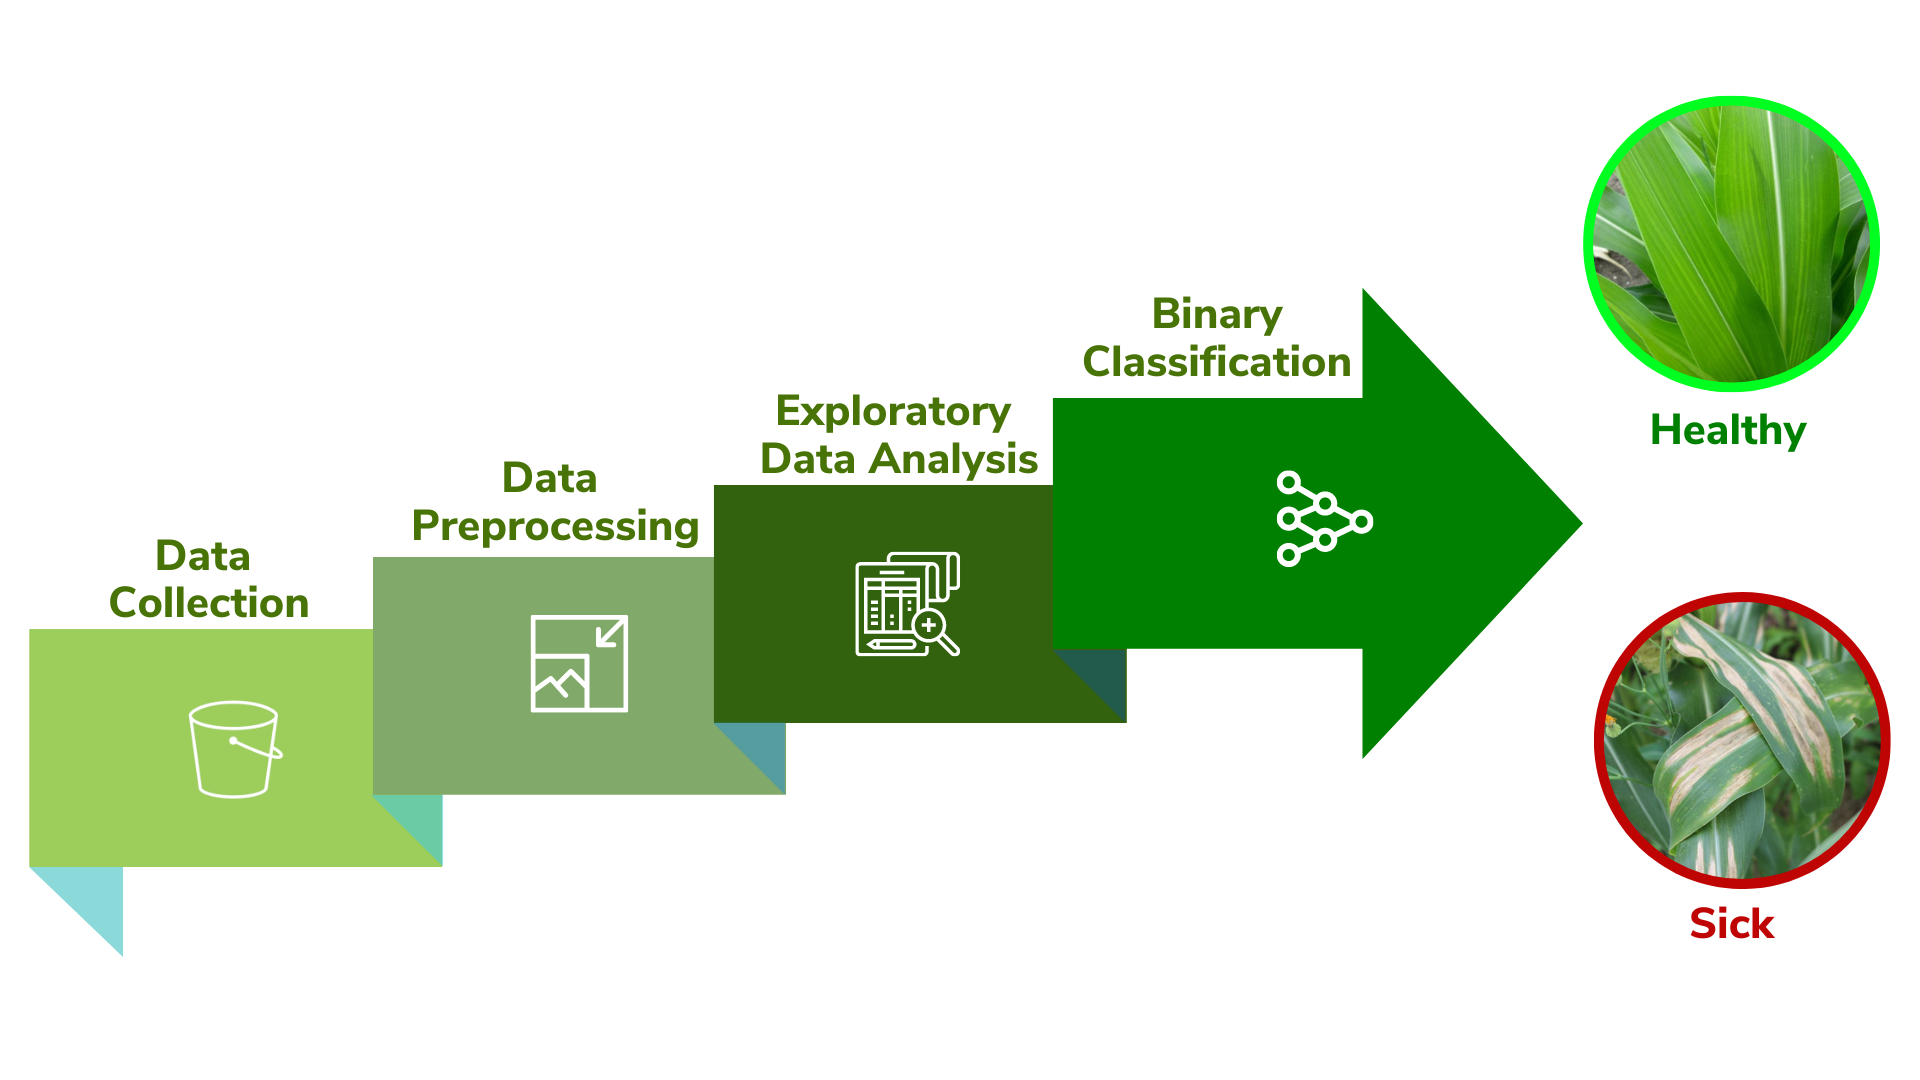

<left><span style="color:gray; font-size:16px"><b>Figure 1. </b>Methodology</span></left>

The methodology is presented in **Figure 1: Methodology** and involves a four-step process starting with data collection, followed by data preprocessing, exploratory data analysis, and concluding with binary classification using a Multilayer Perceptron (MLP).

The detailed steps of each phase are shown in **Table 1: Methodology Details.**

<left><span style="color:gray; font-size:16px"><b>Table 1. </b>Methodology Details</span></left>
<table>
    <tr style="color:#ffffff; font-weight: bold; background-color:#487307">
        <th style="text-align: left">NO.</th>
        <th style="text-align: left">STEP</th>
        <th style="text-align: left">DESCRIPTION</th>
    </tr>
    <tr>
        <td style="text-align: left; font-weight: bold; color:#000000">1.</td>
        <td style="text-align: left; font-weight: bold; color:#000000">Data Collection</td>
        <td style="text-align: left; ">Collect and read the image dataset using PySpark. </td>
    </tr>
    <tr>
        <td style="text-align: left; font-weight: bold; color:#000000">2.</td>
        <td style="text-align: left; font-weight: bold; color:#000000">Data Preprocessing</td>
        <td style="text-align: left; ">Convert the images to grayscale, resize them to standardize the input for the machine learning model. Normalize and transform the images to DenseVector for compatibility with PySpark's machine learning library.</td>
    </tr>
    <tr>
        <td style="text-align: left; font-weight: bold; color:#000000">3.</td>
        <td style="text-align: left; font-weight: bold; color:#000000">Exploratory Data Analysis</td>
        <td style="text-align: left; ">Perform visual inspection, check class distribution, and apply balancing techniques such as random undersampling on the majority class (<b><span style="color:#AC2319">sick</span></b> leaves). Analyze size and pixel value distributions, and assess overall image quality.</td>
    </tr>
    <tr>
        <td style="text-align: left; font-weight: bold; color:#000000">4.</td>
        <td style="text-align: left; font-weight: bold; color:#000000">Binary Classification</td>
        <td style="text-align: left; ">Train a Multilayer Perceptron (MLP) for binary classification to distinguish between <b><span style="color:#487307">healthy</span></b> and <b><span style="color:#AC2319">sick</span></b> corn plant images. Evaluate the model based on accuracy, precision, recall, and F1-score. </td>
    </tr>
</table>

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Collection'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">4. DATA COLLECTION</h1>

The first step in the methodology is to collect the necessary data. In this case, the team will focus on the dataset titled "Field images of maize annotated with disease symptoms" from the Center for Open Science's open-source Open Science Framework (OSF) Image set for deep learning [(Wiesner-Hanks & Brahimi, 2018)](#osf).

The data collection section consists of three key steps, which are as follows:

1. Identifying the <b>data source</b>.
1. <b>Describing the data</b>.
1. <b>Collecting the data</b>.

---
<a id='Source'></a>
<h2 style="color:#487307; font-size:26px;">4.1 Data Source</h2>

The data for this study was collected from the OSF repository [(Wiesner-Hanks & Brahimi, 2018)](#osf). This repository contains a large, publicly available collection of <b>drone-captured field images of maize leaves</b> meticulously annotated to mark the lesions caused by <b><span style="color:#AC2319">NLB</span></b>. 

The dataset, summarized in <b>Table 2. Data Source</b>, includes <b>7,664</b> unique images collected over a span of 5 months, of which 2,025 are <b><span style="color:#487307">healthy</span></b> leaves and 5,639 are <b><span style="color:#AC2319">sick</span></b> leaves caused by <b><span style="color:#AC2319">NLB</span></b>. It also comes with a comma-separated values (.csv) file containing the endpoint coordinates of each annotation line. Images with 0 values for all four endpoint coordinates indicate the absence of visible lesions [(Wiesner-Hanks et al., 2018)](#source).

<left><span style="color:gray; font-size:16px"><b>Table 2. </b>Data Source</span></left>
<div style="float: left">
    <table>
        <tr style="color:#ffffff; font-weight: bold; background-color:#487307">
            <th style="text-align: left">NAME</th>
            <th style="text-align: left">FILE TYPE</th>
            <th style="text-align: left">REPOSITORY</th>
        </tr>
        <tr>
            <td style="text-align: left">IMAGES_DRONE</td>
            <td style="text-align: left">.tar.gz(folder with .jpg files)</td>
            <td style="text-align: left; ">https://osf.io/25agh</td>
        </tr>
        <tr>
            <td style="text-align: left">ANNOTATIONS_DRONE</td>
            <td style="text-align: left">.csv</td>
            <td style="text-align: left; ">https://osf.io/vfawp</td>
        </tr>
    </table>
</div>


---
<a id='Description'></a>
<h2 style="color:#487307; font-size:26px;">4.2 Data Description</h2>

In this subsection, the data dictionaries of images and annotations datasets were summarized in <b>Table 3. Data Description of Features Used</b>, providing details about the description and data type of each feature. This aids in understanding the data and identifying any data quality issues that may require preprocessing.

Additionally, the team observed that the images data is of high quality, as it was collected using a drone and has a dimension of 6000 x 4000 pixels. These images are captured in RGB color space, which enables a realistic representation of the field view. This realistic representation is crucial for accurately diagnosing the plant disease. Furthermore, all the images have been classified by experts into <b><span style="color:#487307">healthy</span></b> or <b><span style="color:#AC2319">sick</span></b> categories, ensuring the reliability of the data for training machine learning (ML) models. The involvement of experts in the classification process ensures that the identified lesions are specifically caused by <b><span style="color:#AC2319">NLB</span></b> and not by other diseases or factors such as insect feeding. This aspect ensures the robustness of the dataset for ML model training.

<left><span style="color:gray; font-size:16px"><b>Table 3. </b>Data Description of Features Used</span></left>
<div style="float: left">
<table>
    <tr style="color:#ffffff; font-weight: bold; background-color:#487307">
        <th style="text-align: left">FEATURE NAME</th>
        <th style="text-align: left">DESCRIPTION</th>
        <th style="text-align: left">DATA TYPE</th>
    </tr>
    <tr>
        <td style="text-align: left;">image</td>
        <td style="text-align: left">Filepath of the image.</td>
        <td style="text-align: left">string</td>
    </tr>
    <tr>
        <td style="text-align: left;">image_vector</td>
        <td style="text-align: left">Vector-converted images.</td>
        <td style="text-align: left">string</td>
    </tr>
    <tr>
        <td style="text-align: left;">file_name</td>
        <td style="text-align: left">Name of the image.</td>
        <td style="text-align: left">string</td>
    </tr>
    <tr>
        <td style="text-align: left;">x1</td>
        <td style="text-align: left">One of the four endpoint coordinates pertaining to annotations of <b><span style="color:#AC2319">sick</span></b> leaves.</td>
        <td style="text-align: left">integer</td>
    </tr>
    <tr>
        <td style="text-align: left;">y1</td>
        <td style="text-align: left">One of the four endpoint coordinates pertaining to annotations of <b><span style="color:#AC2319">sick</span></b> leaves.</td>
        <td style="text-align: left">integer</td>
    </tr>
    <tr>
        <td style="text-align: left;">x2</td>
        <td style="text-align: left">One of the four endpoint coordinates pertaining to annotations of <b><span style="color:#AC2319">sick</span></b> leaves.</td>
        <td style="text-align: left">integer</td>
    </tr>
    <tr>
        <td style="text-align: left;">y2</td>
        <td style="text-align: left">One of the four endpoint coordinates pertaining to annotations of <b><span style="color:#AC2319">sick</span></b> leaves.</td>
        <td style="text-align: left">integer</td>
    </tr>
    <tr>
        <td style="text-align: left;">target</td>
        <td style="text-align: left">Derived from x1, y1, x2, and y2 features. If at least x1 and y1 features are zero, target=0 (<b><span style="color:#487307">healthy</span></b>). Otherwise, target=1 (<b><span style="color:#AC2319">sick</span></b>)</td>
        <td style="text-align: left">integer</td>
    </tr>
</table>
</div>

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---
<a id='Collect'></a>
<h2 style="color:#487307; font-size:26px;">4.3 Data Collection</h2>

The following steps demonstrate the collection and loading of the images and annotation datasets into Spark DataFrames.

<h3 style="color:#487307;">4.3.1 Create a Spark Session</h3>

To ensure compliance with the requirement of limiting the instances of the nodes to a maximum of 16 GB RAM, the Spark session was created with the driver and executors allocated memory size of 16 gigabytes (GB) each.

In [19]:
# Create a Spark Session
spark = (SparkSession
         .builder
         .master('local[*]')
         .config("spark.driver.memory", "16g")
         .config("spark.executor.memory", "16g")
         .getOrCreate())
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "24")

# Disable logging messages
spark.sparkContext.setLogLevel('OFF')
display(HTML(f'<b>SparkSession created.</b>'))

<h3 style="color:#487307;">4.3.2 Load and store the dataset in a Spark DataFrame format</h3>

This subsection includes organizing and creating a dataframe with image file paths using `spark.createDataFrame()` and reading the csv file of annotations using `spark.read.csv()`.

<h4 style="color:#487307;">4.3.2.1 Images</h4>

In [6]:
# Define directory and image files
image_directory = "DRONE_IMAGES/DRONE_IMAGES"
image_filenames = os.listdir(image_directory)
image_filepaths = [os.path.join(image_directory, image_filename)
                   for image_filename in image_filenames]

# Create a pandas dataframe with the file paths
pandas_dataframe_images = pd.DataFrame(image_filepaths, columns=['file_path'])

# Convert the pandas dataframe to a PySpark dataframe
pyspark_dataframe_images = spark.createDataFrame(pandas_dataframe_images)

display(HTML(f'<b>PySpark DataFrame for Images created.</b>'))
display(HTML(f"<b>Showing maize images' schema:</b>"))
pyspark_dataframe_images.printSchema()

root
 |-- file_path: string (nullable = true)



<h4 style="color:#487307;">4.3.2.2 Annotations</h4>

In [7]:
# Read the annotations CSV file as a DataFrame
annotations_filepath = "drone.csv"
pyspark_annotations_dataframe = (spark
                                 .read
                                 .option("header", "true")
                                 .csv(annotations_filepath)
                                 .dropDuplicates(['image']))

display(HTML(f'<b>PySpark DataFrame for Annotations created.</b>'))
display(HTML(f"<b>Showing annotations' schema:</b>"))
pyspark_annotations_dataframe.printSchema()

root
 |-- image: string (nullable = true)
 |-- x1: string (nullable = true)
 |-- y1: string (nullable = true)
 |-- x2: string (nullable = true)
 |-- y2: string (nullable = true)
 |-- user: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)
 |-- year: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Prepare'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">5. DATA PREPROCESSING</h1>

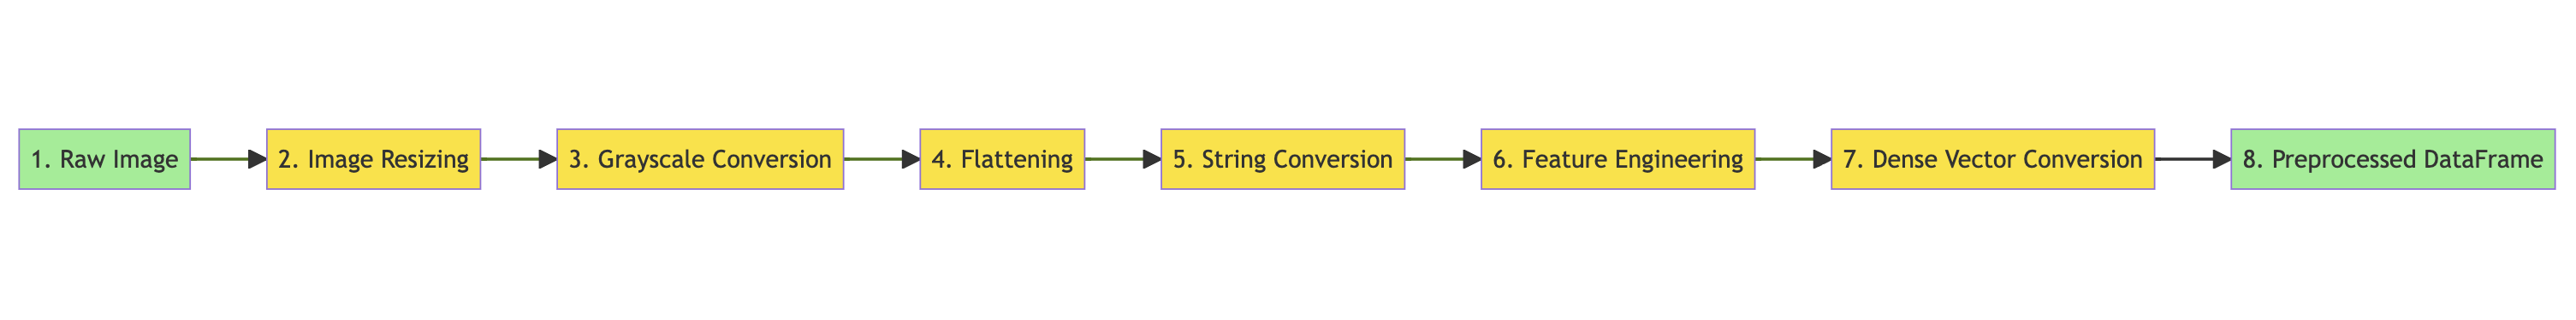
<left><span style="color:gray; font-size:16px"><b>Figure 2. </b>Preprocessing Steps</span></left>

Images, being complex, often require unique preprocessing steps compared to structured annotations CSV data. The team created and employed the `preprocess_images()` function, with high-level steps outlined in <b>Figure 2. Preprocessing Steps</b>. These steps made the image data suitable for further analysis and machine learning algorithms:

1. <b>Image Reading</b>: The `Image.open()` method was used to read images from the provided file paths.

1. <b>Image Resizing</b>: All images were resized to a standard dimension of 25x25 pixels to ensure consistency.

1. <b>Grayscale Conversion</b>: The resized images were converted to grayscale since color information is not essential for this binary classification task. This conversion reduced computational complexity without significantly sacrificing classification results. The `convert('L')` method, where 'L' stands for luminance or brightness, was used for grayscale conversion.

1. <b>Flattening</b>: The grayscale images were then flattened into 1D vectors, forming a suitable input for machine learning algorithms. This was achieved by converting the 2D grayscale image into a numpy array and subsequently flattening it.

1. <b>String Conversion</b>: These flattened image vectors were transformed into strings for easy storage and retrieval. This was accomplished by joining each element of the numpy array into a string, separated by commas.

    After these transformations, a User-Defined Function (UDF) in PySpark applied the preprocessing to the input DataFrame. The next steps involved feature engineering and dense vector conversion:

1. <b>Feature Engineering</b>: This step added a new `target` column based on the conditions in the `x1` and `y1` columns (assigned 0 if `x1` and `y1` were both 0, otherwise assigned 1). `file_path` column was also renamed to `image`, and filenames were stored in a new `filename` column. Lastly, only the relevant columns, such as `image` (containing the filepaths), `filename`, `image_vector`, and `target`, were retained in the DataFrame.

1. <b>Dense Vector Conversion</b>: At this point, each string in the `image_vector` column of the DataFrame was transformed into a DenseVector. This process involved parsing the string of comma-separated values, converting each value into a float, and packaging these values into a DenseVector. A User-Defined Function (UDF) named `parse_vector_udf` was created for this purpose, and it was applied to the `image_vector` column of the DataFrame, resulting in a new `image_vector` column where each string was replaced by a DenseVector.

Finally, after performing all the preprocessing steps, the result was a preprocessed DataFrame with `image`, `image_vector`, `filename`, and `target` columns. This preprocessed DataFrame was prepared and ready for use in subsequent stages.

<h3 style="color:#487307;">5.0.1 Steps 1 to 5: Basic Preprocessing</h3>

In [8]:
# Preprocess the Pyspark dataframe containing the images' filepaths
display(HTML(f'<b>Applying basic preprocessing steps to the image dataset '
             f'...</b>'))
preprocessed_images_df = preprocess_images(pyspark_dataframe_images)

display(HTML(f'<b>Basic preprocessing completed.</b>'))
display(HTML(f'<b>Displaying three sample rows:</b>'))
preprocessed_images_df.show(3)

+--------------------+--------------------+-------------------+
|               image|        image_vector|           filename|
+--------------------+--------------------+-------------------+
|DRONE_IMAGES/DRON...|174,90,174,192,19...|J_170908_123124.jpg|
|DRONE_IMAGES/DRON...|158,167,118,63,23...|J_170911_141946.jpg|
|DRONE_IMAGES/DRON...|245,155,138,178,1...|J_170911_151908.jpg|
+--------------------+--------------------+-------------------+
only showing top 3 rows



<h3 style="color:#487307;">5.0.2 Merge the Image df and Annotations df</h3>

In [9]:
# Merge the image DataFrame with the CSV DataFrame
display(HTML(f'<b>Merging the image df and the annotations df ...</b>'))
merged_dataframe = (
    preprocessed_images_df.join(
        pyspark_annotations_dataframe, 
        preprocessed_images_df.filename == 
        pyspark_annotations_dataframe.image, 
        "inner")
    .drop(pyspark_annotations_dataframe.image))

display(HTML(f'<b>PySpark DataFrame for Images and Annotations merged.</b>'))
display(HTML(f"<b>Displaying three sample rows:</b>"))
merged_dataframe.show(3)

+--------------------+--------------------+-------------------+----+----+----+----+----+---+-----+----+----+------+
|               image|        image_vector|           filename|  x1|  y1|  x2|  y2|user|day|month|year|hour|minute|
+--------------------+--------------------+-------------------+----+----+----+----+----+---+-----+----+----+------+
|DRONE_IMAGES/DRON...|174,90,174,192,19...|J_170908_123124.jpg|4359|2395|4990|2390| Tyr|  9|    4|2018|  17|    17|
|DRONE_IMAGES/DRON...|158,167,118,63,23...|J_170911_141946.jpg|2564|2564|2769| 764| Tyr|  9|    4|2018|  16|    26|
|DRONE_IMAGES/DRON...|245,155,138,178,1...|J_170911_151908.jpg|4179|2810|3641|3369| Tyr| 15|    1|2018|  14|    53|
+--------------------+--------------------+-------------------+----+----+----+----+----+---+-----+----+----+------+
only showing top 3 rows



<h3 style="color:#487307;">5.0.3 Step 6: Feature Engineering</h3>

In [10]:
display(HTML(f'<b>Updating the schema of the merged DataFrame, adding '
             f'target, and selecting only relevant columns...</b>'))
display(HTML(f'<b>Before:</b>'))
merged_dataframe.printSchema()

display(HTML(f'<b>After:</b>'))
updated_dataframe = (merged_dataframe
                   .select(merged_dataframe.image,
                           merged_dataframe.filename, 
                           merged_dataframe.image_vector, 
                           col("x1").cast("int"), 
                           col("y1").cast("int"), 
                           col("x2").cast("int"), 
                           col("y2").cast("int")))

# Add a target column
updated_dataframe = (updated_dataframe
                   .withColumn("target", 
                               when((col("x1") == 0) & (col("y1") == 0), 0)
                               .otherwise(1)))

# Select only relevant columns 
updated_dataframe = (updated_dataframe
                   .select(updated_dataframe.image,
                           updated_dataframe.filename, 
                           updated_dataframe.image_vector, 
                           updated_dataframe.target))
updated_dataframe.printSchema()
display(HTML(f"<b>Displaying three sample rows of the updated "
             f"DataFrame:</b>"))
updated_dataframe.show(3)

root
 |-- image: string (nullable = true)
 |-- image_vector: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- x1: string (nullable = true)
 |-- y1: string (nullable = true)
 |-- x2: string (nullable = true)
 |-- y2: string (nullable = true)
 |-- user: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)
 |-- year: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



root
 |-- image: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- image_vector: string (nullable = true)
 |-- target: integer (nullable = false)



+--------------------+-------------------+--------------------+------+
|               image|           filename|        image_vector|target|
+--------------------+-------------------+--------------------+------+
|DRONE_IMAGES/DRON...|J_170908_123124.jpg|174,90,174,192,19...|     1|
|DRONE_IMAGES/DRON...|J_170911_141946.jpg|158,167,118,63,23...|     1|
|DRONE_IMAGES/DRON...|J_170911_151908.jpg|245,155,138,178,1...|     1|
+--------------------+-------------------+--------------------+------+
only showing top 3 rows



<h3 style="color:#487307;">5.0.4 Step 7: Dense Vector Conversion</h3>

In [11]:
# Apply the parse_vector_udf UDF to the 'image_vector' column of the df
# Create a new column 'image_vector' containing the parsed DenseVector
display(HTML(f"<b>Converting image_vector to a dense vector ...</b>"))
display(HTML(f"<b>image_vector successfully converted to a "
             f"dense vector.</b>"))
final_dataframe = (updated_dataframe
                   .withColumn(
                       'image_vector', 
                       parse_vector_udf(updated_dataframe['image_vector'])))

display(HTML(f"<b>Displaying three sample rows of the Final DataFrame:</b>"))
final_dataframe.show(3)

+--------------------+-------------------+--------------------+------+
|               image|           filename|        image_vector|target|
+--------------------+-------------------+--------------------+------+
|DRONE_IMAGES/DRON...|J_170908_123124.jpg|[174.0,90.0,174.0...|     1|
|DRONE_IMAGES/DRON...|J_170911_141946.jpg|[158.0,167.0,118....|     1|
|DRONE_IMAGES/DRON...|J_170911_151908.jpg|[245.0,155.0,138....|     1|
+--------------------+-------------------+--------------------+------+
only showing top 3 rows



[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Analytics'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">6. EXPLORATORY DATA ANALYSIS (EDA)</h1>

The goal of this section is to reveal key insights from the dataset through various analytical techniques and visualization tools. Here, the team used Apache Spark DataFrame and Matplotlib to perform descriptive analytics and visually understand the data. This section is summarized into three parts:

1. **Basic EDA**: This step involves checking for missing or null values to ensure the data's completeness. A summary statistics assessment on the numerical `target` column was also performed to understand the basic measures such as `mean`, `median`, `mode`, `range`, and `standard deviation`. This step helped outline the basic distribution and spread of the `target` variable.

1. **Visual Inspection**: This includes visually inspecting a sample set of maize leaf images, a step critical in familiarizing the data's quality and variability. This exploration offered valuable insights about different conditions represented in the images, including diverse leaf conditions and associated complexities. Potential challenges like variability in lighting, color, distance, and the presence of background noise in the images were observed. 

1. **Class Distribution**: This step includes visualizing the class distribution and noting class imbalance in the data. To address this imbalance, `RandomUnderSampling` was performed on the majority class (<b><span style="color:#AC2319">sick</span></b>), achieving a more balanced dataset that is crucial for model performance in the subsequent binary classification task.

With these steps, the team ensured that the `balanced_data` DataFrame is clean, balanced, and ready for the binary classification.

<h3 style="color:#487307;">6.0.1 Basic EDA</h3>

In [12]:
# Perform Basic EDA on the data
display(HTML(f"<b>Basic EDA:</b>"))
perform_basic_eda(final_dataframe.toPandas())

image           0
filename        0
image_vector    0
target          0
dtype: int64

target
count  7664.000000
mean      0.735778
std       0.440947
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

**COMMENTS/INSIGHTS**:

The results of basic EDA showed no null vaues in the final dataframe. On the other hand, considering that there are only 0 (<b><span style="color:#487307">healthy</span></b>) and 1 (<b><span style="color:#AC2319">sick</span></b>) values in the `target` column, the `mean` of the final dataframe indicates a class imbalance. This will be further investigated and corrected/balanced in the subsequent sections.

<h3 style="color:#487307;">6.0.2 Visual Inspection</h3>

In this subsection, the team inspected various samples of images that help provide insights about the quality, variability, and potential challenges in using the images.

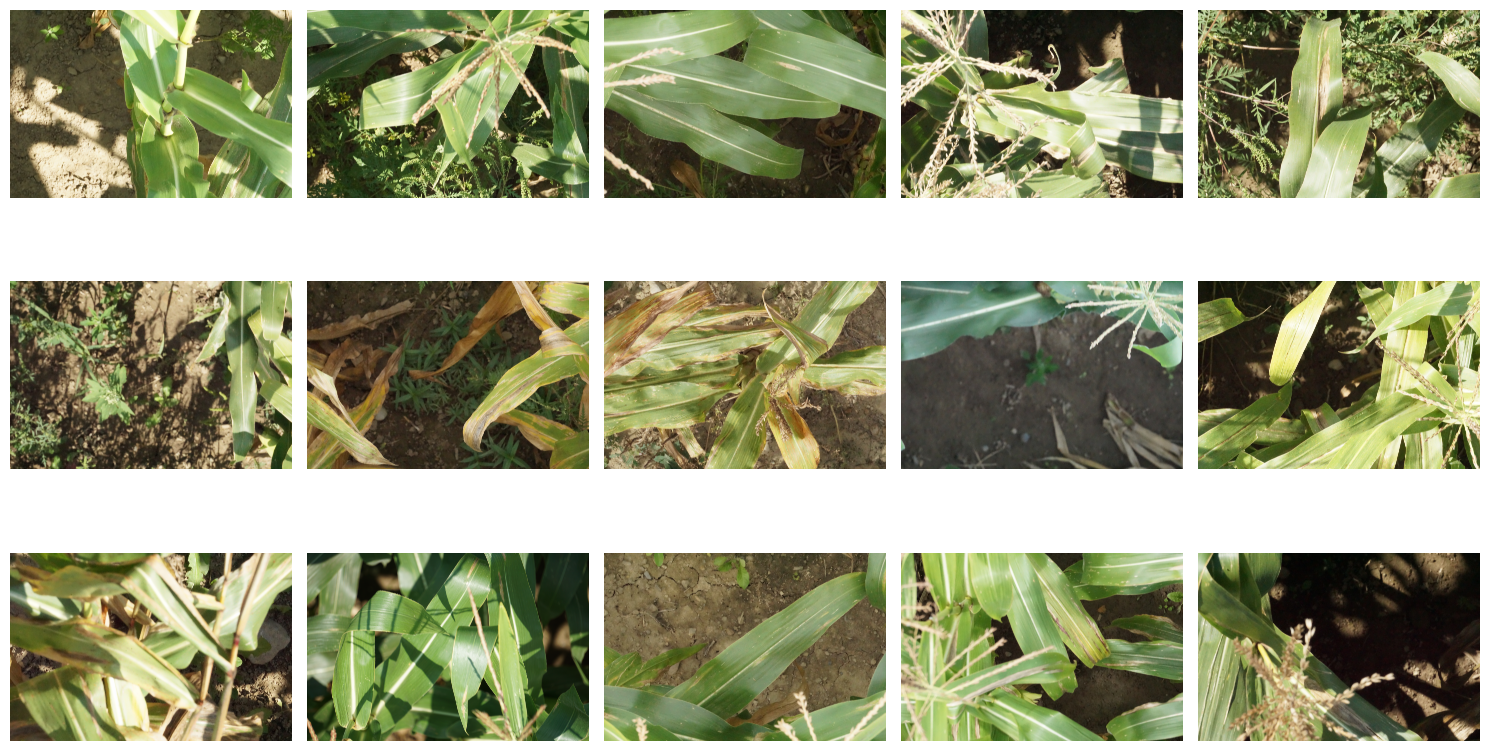

In [13]:
# Display 15 sample images
display(HTML(f"<b>Displaying 15 sample images:</b>"))
visual_inspection(final_dataframe, 15)
display(HTML(f'<left><span style="color:gray; font-size:16px"><b>Figure 3. '
             f'</b>Sample Maize Images</span></left>'))

**COMMENTS/INSIGHTS**:

The inspection of the images, including those in <b>Figure 3: Sample Maize Images</b>, revealed some pertinent observations, summarized as follows:
- These images, taken in a single field in central New York State, showcase a diverse range of maize leaf conditions. The varying lighting, color, distance, and size encountered in these images create a robust set for training the model. This variety is critical for the model's learning ability, as it increases the chance of the model generalizing well to unseen data.
- Healthy maize leaves are present in the dataset, displaying a vibrant green color with no visible signs of disease or stress. These form a baseline for comparison with less healthy specimens.
- Some leaves show visible signs of disease or environmental stress, including discoloration, spots, curling, or wilting. These variations are important for the model to learn how to identify and differentiate between different conditions.
- The presence of multiple leaves or parts of the surrounding environment in some images adds complexity to the analysis, but also mirrors real-world conditions, enhancing the model's potential applicability to real-life scenarios.
- However, the model's learning could be complicated by the additional elements in each image. There's a potential risk of the model learning too much noise from the leaf backgrounds or non-target objects. This could result in reduced performance when distinguishing healthy leaves from sick ones, particularly in images where the leaf background is prominent.

<h3 style="color:#487307;">6.0.3 Class Distribution</h3>

Given the classification problem at hand, the team examined the class distribution to determine if it was balanced. However, upon observation, it was found that the classes were actually imbalanced. In order to address this issue, the team implemented `RandomUnderSampling` technique specifically on the <b><span style="color:#AC2319">sick</span></b> leaves, which belonged to the majority class. This technique helped reduce the number of instances in the majority class, thereby balancing the class distribution and addressing the issue of class imbalance.

In [14]:
# Display class distribution
display(HTML(f"<b>Displaying class distribution before "
             f"RandomUnderSampling:</b>"))
class_distribution(final_dataframe, 'target')

+------+-----+
|target|count|
+------+-----+
|     1| 5639|
|     0| 2025|
+------+-----+



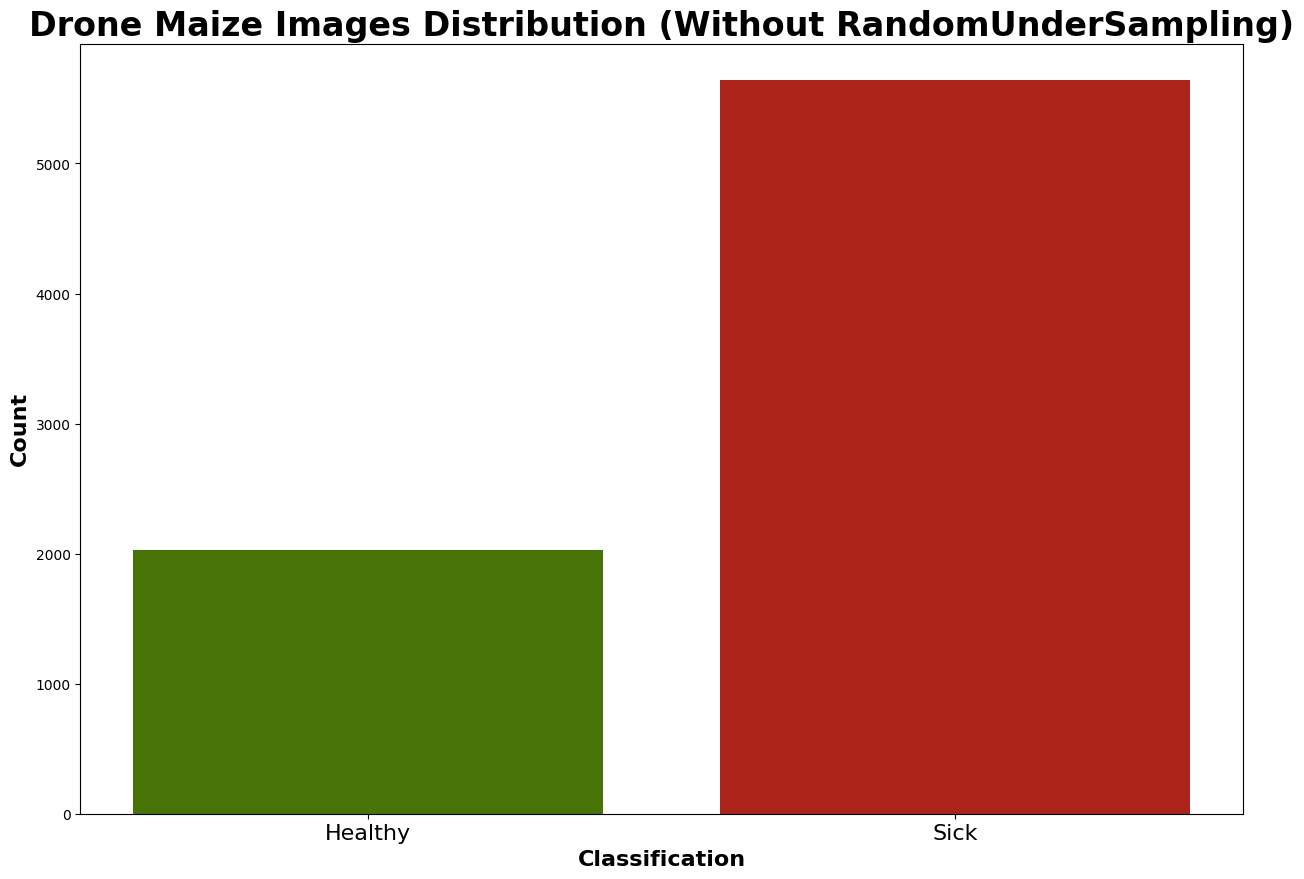

In [15]:
# Display class distribution
distribution = final_dataframe.groupBy('target').count().collect()
plot_distribution_spark(distribution, "Without")
display(HTML(f'<left><span style="color:gray; font-size:16px"><b>Figure 4. '
             f'</b>Drone Maize Images Distribution (Before '
             f'RandomUnderSampling)</span></left>'))

Since there is a significant class imbalance, the team performed `RandomUnderSampling` technique specifically on the <b><span style="color:#AC2319">sick</span></b> leaves, majority class.

In [16]:
# Perform RandomUnderSampling of the majority class (sick)
display(HTML(f"<b>RandomUnderSampling of the majority class completed.</b>"))
balanced_data = perform_random_undersampling(final_dataframe, 'target')
class_distribution(balanced_data, 'target')

+------+-----+
|target|count|
+------+-----+
|     0| 2025|
|     1| 2025|
+------+-----+



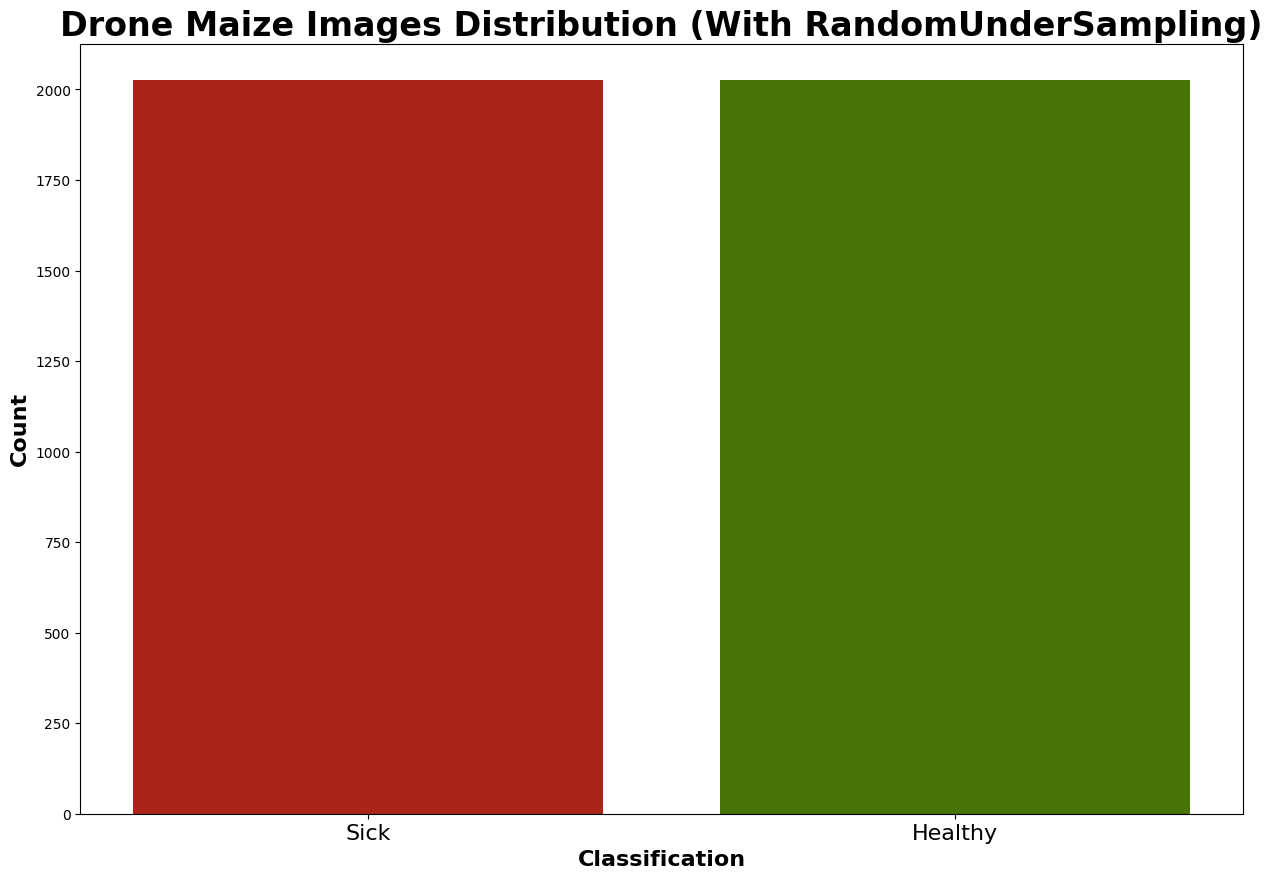

In [17]:
# Display class distribution
distribution = balanced_data.groupBy('target').count().collect()
plot_distribution_spark(distribution, "With")
display(HTML(f'<left><span style="color:gray; font-size:16px"><b>Figure 5. '
             f'</b>Drone Maize Images Distribution (After '
             f'RandomUnderSampling)</span></left>'))

The `balanced_data` DataFrame has been successfully cleaned and balanced, rendering it suitable for binary classification. It is now prepared for subsequent stages of the binary classification process.

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Classification'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">7. BINARY CLASSIFICATION</h1>

This section focuses on the binary classification of maize leaf health status using a `Multilayer Perceptron Classifier`, a type of Artificial Neural Network. The primary steps include data splitting, model training, prediction, and model performance evaluation.

The model's performance will be evaluated using various metrics including accuracy, precision, recall, F1 score, and confusion matrix. These metrics provide a comprehensive view of the model's ability to correctly identify the classes of interest and the types of errors it makes.

+------+---+----+
|target|0.0| 1.0|
+------+---+----+
|     1|  0|1598|
|     0| 22|   0|
+------+---+----+



None

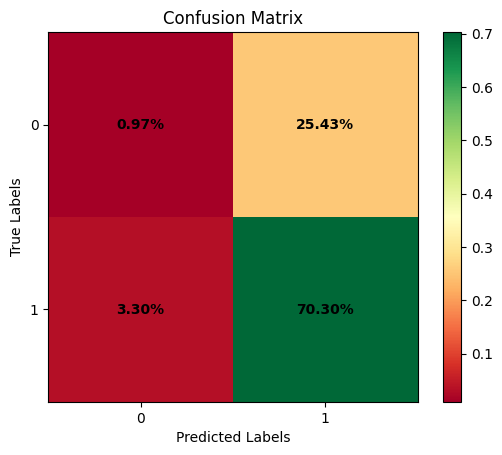

In [18]:
# Perform the binary classification
perform_classification(balanced_data)

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Results'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">8. RESULTS AND DISCUSSION</h1>

The purpose of this study was to correctly classify maize plants that are <b><span style="color:#AC2319">sick</span></b> from NLB disease using drone-taken images. The developed model successfully classified the health status of maize plants with an accuracy of <b><span style="color:#487307">71.27%</span></b>. This performance exceeded the <b>Proportional Chance Criterion (PCC)</b> multiplied by 1.25, which stood at <b>62.5%</b>. This indicates that the model has learned and generalised patterns in the data effectively.

A review of the model's key performance metrics is as follows:

- **Precision**: The precision of the model was calculated to be approximately 60.04%. This implies that, of all the maize plants predicted to be sick by the model, about 60.04% were correctly classified.
- **Recall**: The recall, also known as sensitivity, was around 71.27%. This indicates that the model was able to correctly identify 71.27% of the total actual sick plants.
- **F1 Score**: The F1 score, which is the harmonic mean of precision and recall, stood at 62.78%. It gives a balanced measure of the model's performance.

While accuracy, precision, recall, and F1-score are all crucial, considering the business context and problem at hand, <b><span style="color:#487307">recall</span></b> is the most critical metric here. This is because it is more important to correctly identify <b><span style="color:#AC2319">sick</span></b> plants (<b><span style="color:#487307">true positives</span></b>) and minimize the chance of overlooking <b><span style="color:#AC2319">sick</span></b> plants (<b><span style="color:#487307">true positives</span></b>) and minimize the chance of overlooking <b><span style="color:#AC2319">false negatives</span></b>). This helps the farmer take timely action to prevent disease spread, which could potentially lead to billions of pesos in losses.

The confusion matrix, when expressed as percentages of the test set, also offers valuable insights (actual-predicted):

- **0.97%**: <b><span style="color:#487307">healthy</span></b>-<b><span style="color:#487307">healthy</span></b>: This is the ideal scenario, where the model correctly identifies healthy maize plants, thereby saving unnecessary checks.
- **25.43%**: <b><span style="color:#487307">healthy</span></b>-<b><span style="color:#AC2319">sick</span></b>: In this instance, additional resources would be allocated to recheck healthy plants that were mistakenly classified as sick, causing some financial strain. 
- **3.3%**: <b><span style="color:#AC2319">sick</span></b>-<b><span style="color:#487307">healthy</span></b>: While a small percentage, this is a significant area of concern, as sick maize plants misclassified as healthy could lead to uncontrolled disease spread. 
- **70.30%**: <b><span style="color:#AC2319">sick</span></b>-<b><span style="color:#AC2319">sick</span></b>: The model successfully diagnosed a substantial percentage of sick maize plants correctly, providing a valuable tool for early disease detection and prevention.

These results demonstrate the potential of the model as a useful tool in precision agriculture. However, the identified areas for improvement, particularly in minimizing false negatives and false positives, should be addressed in future iterations of the model. Further optimization techniques and inclusion of additional relevant features could potentially enhance the model's performance.

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Conclusion'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">9. CONCLUSION</h1>

This notebook aims to address the problem at hand, which is the accurate classification of maize plants suffering from the NLB disease, using drone-captured images. The study was motivated by the urgent need for early detection and prevention of NLB disease in maize crops, considering its significant impact and potential for substantial economic losses in the agricultural industry. 

The methodology adopted was comprehensive, starting with data collection through the OSF repository. The high-resolution drone-taken images included a CSV file containing annotations and then subjected to a rigorous preprocessing pipeline. This involved image resizing, grayscale conversion, feature engineering, and dense vector conversion, all crucial steps in ensuring the quality and relevance of the input to the model.

In-depth exploratory data analysis (EDA) was performed, revealing important insights about the nature of the data and its distribution. This included a detailed review of feature distributions, which guided subsequent steps in the modeling process. One significant finding was the class imbalance in the dataset, which was addressed using the RandomUnderSampling technique to balance the instances of healthy and sick leaves in the data.

The research leveraged the power of Multilayer Perceptron Classifier, a type of Artificial Neural Network, for the binary classification task. The model's performance was evaluated using various metrics, including accuracy, precision, recall, F1 score, and confusion matrix. The model achieved a commendable accuracy of 71.27%, exceeding the established Proportional Chance Criterion (PCC) benchmark.

Notably, the recall of the model stood at 71.27%, indicating the model's ability to correctly identify a significant proportion of <b><span style="color:#AC2319">sick</span></b> maize plants. This is crucial in the context of the study, as early and accurate detection can enable timely interventions, preventing the disease from spreading and saving substantial financial resources in the agricultural sector.

However, the study also identified areas of improvement, particularly in minimizing false negatives and false positives. Future iterations of the model should focus on these areas and explore further optimization techniques and inclusion of additional relevant features to enhance the model's performance.

Overall, this study signifies the potential of advanced machine learning techniques in addressing complex real-world problems, such as the early detection of plant diseases. It also underscores the role of precision agriculture as an important tool for sustainable and efficient farming practices.

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='Recommendation'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">10. RECOMMENDATION</h1>

Based on the insights derived from the analysis, the team presents the data assumptions and limitations and proposes the following recommendations for immediate implementation and future work:

---
<a id='Limitations'></a>
<h2 style="color:#487307; font-size:26px;">10.1 Data Assumptions and Limitations</h2>

The analysis in this report relies on certain assumptions and encounters certain limitations that are inherent to the data used. These assumptions and limitations are as follows:

**Assumptions:**
- The drone images used in the study accurately represent the health status of maize plants.
- The study assumes that the labeling process of the drone-captured images is accurate, thereby correctly differentiating between healthy and sick plants.
- It is assumed that the drone-captured images are of high-quality, free from blurring, shadows, or other distortions that could impact the model's performance.



**Limitations:**

- The data was collected during a particular period and specific environmental conditions in a New York State, which may not account for variations across different seasons or environmental settings.
- The image dataset only covers maize leaves, and therefore might not fully represent other parts of the maize plant that could also be affected by NLB disease.
- The dataset does not include other factors that could influence the spread of NLB disease, such as soil health, irrigation practices, and usage of fertilizers and pesticides.
- The study is limited to binary classification (healthy or sick) and does not consider different stages or severity of the disease.

---
<a id='Recommendation2'></a>
<h2 style="color:#487307; font-size:26px;">10.2 For Immediate Implementation</h2>

Recommendations for immediate implementation involve a multifaceted approach, capitalizing on the promising start provided by the current machine learning model:

1. **Model Deployment and Refinement**: The machine learning model, with its potential for early and accurate detection of diseases in corn crops, should initially be implemented in controlled testing environments. Continuous evaluation and refinement of the model based on its performance will ensure its accuracy and efficacy.

2. **Integration into Mobile Applications**: To maximize accessibility and ease-of-use, the model should be incorporated into a mobile application. This would allow farmers to instantly identify potential diseases simply by taking a picture of a corn leaf, enabling swift detection and subsequent treatment, thereby improving corn yields.

3. **User Education and Training**: The model's effectiveness is contingent on the correct use by the end-users, primarily farmers and agronomists. Consequently, a comprehensive education and training program must be implemented to familiarize users with the technology, emphasizing the importance of capturing high-quality images to ensure accurate disease detection.

4. **Partnerships for Wider Reach**: Collaboration with agricultural extension services can significantly enhance the model's reach and impact. Integrating this tool into their existing farmer support initiatives could promote widespread adoption and consistent usage.

5. **Data Collection Enhancement**: The accuracy of the model is tied to the diversity and breadth of the dataset. Therefore, concerted efforts should be made to expand data collection practices. This should include capturing images under different seasons, environmental conditions, geographical locations, and other parts of the maize plant.

6. **Model Performance Improvement**: The model's ability to minimize false negatives and positives should be enhanced to improve its reliability. This could be achieved through techniques such as hyperparameter tuning, the exploration of alternative modeling techniques, or the use of ensemble methods.

7. **Incorporation of Additional Features**: The model's predictive performance can be further enhanced by integrating additional relevant features. This could include variables such as weather conditions, crop age, and soil health, providing a more holistic understanding of the factors influencing crop disease.

8. **Tailored Training for Users**: Considering the model's potential users may lack a technical background, it is essential to design training programs tailored for agricultural workers and farmers. These programs should educate them on the practical use of the tool, ensuring they can effectively leverage its capabilities for disease detection and management.

---
<a id='FutureWork'></a>
<h2 style="color:#487307; font-size:26px;">10.3 For Future Work</h2>

The following strategic actions are suggested for future work, with the ultimate aim of enhancing the machine learning model's effectiveness and creating a more comprehensive solution for improving corn yield:

1. **Data Expansion**: To improve the model's performance, particularly with underrepresented disease classes, more comprehensive data collection is necessary. This involves not only the inclusion of diverse disease cases but also an emphasis on underrepresented diseases to ensure a well-balanced and representative dataset.

2. **Holistic Yield Improvement Approach**: It's crucial to recognize that corn yield is influenced by a multitude of factors, including weather conditions, soil type, and farming practices. As such, future efforts should investigate how to incorporate these variables into the model, facilitating a more holistic approach to improving corn yield.

3. **Integration of IoT-Based Sensors**: Real-time data collection using IoT-based sensors should be explored. The incorporation of real-time data can enhance early detection of diseases and contribute to a more proactive approach to disease management.

4. **Development of Predictive Models**: To provide farmers with advance warnings and preventative measure recommendations, predictive models could be developed. These models would anticipate disease spread based on existing conditions, allowing for proactive rather than reactive disease management.

5. **Impact Evaluation**: Regular evaluations of the model's cost-effectiveness and impact on yield improvement should be conducted. This will ensure that the model continues to provide practical, real-world benefits to farmers, and adjustments can be made as necessary.

6. **Temporal Data Collection**: Collecting and incorporating temporal data could offer valuable insights into the progression of diseases over time. Understanding the lifecycle of diseases like NLB could lead to the development of more effective preventive measures.

7. **Investment in Drone Technology**: To improve image resolution and coverage, investment in drone technology should be considered. Drones equipped with multispectral cameras can capture more detailed and comprehensive images of maize crops, enhancing the quality of input data for the model.

8. **Collaboration with Experts**: Cooperation with agronomists and plant pathologists can provide valuable insights into disease risk factors and impacts on maize plants. This expert knowledge can aid in refining the model and enhancing its predictive accuracy.

9. **Advanced Machine Learning Techniques**: Future work should also consider the exploration and integration of more advanced machine learning or deep learning techniques. These can handle complex image datasets more effectively and could further improve disease detection accuracy.

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)

---

<a id='References'></a>
<h1 style="color:#ffffff; background-color:#487307; border: 1px solid #ffffff; padding: 10px 0;">REFERENCES</h1>

<a name='crop'></a>[1] Gerpacio, R. V., Labios, J. D., Labios, R. V., & Diangkinay, E. I. (2004). Maize in the Philippines: Production Systems, Constraints, and Research Priorities. Maize Production Systems Papers, International Maize and Wheat Improvement Center. Retrieved from <br>
https://ageconsearch.umn.edu/record/7650/files/mp04ge01.pdf 

<a name='nlb'></a>[2] "Crop Protection Network." (2023, April 20). An Overview of Northern Corn Leaf Blight. Retrieved from <br>
https://cropprotectionnetwork.org/publications/an-overview-of-northern-corn-leaf-blight

<a name='loss'></a>[3] "University of Delaware." (n.d.) Northern Corn Leaf Blight. Retrieved from <br>
https://www.udel.edu/academics/colleges/canr/cooperative-extension/fact-sheets/northern-corn-leaf-blight/


<a name='osf'></a>[4] Wiesner-Hanks, T., & Brahimi, M. (2018). Field images of maize annotated with disease symptoms [Data set]. Open Science Framework.  <br>
https://osf.io/p67rz/

<a name='source'></a>[5] Wiesner-Hanks, T., Stewart, E. L., Kaczmar, N., DeChant, C., Wu, H., Nelson, R. J., Lipson, H., & Gore, M. A. (2018). Image set for deep learning: field images of maize annotated with disease symptoms. BMC Research Notes, 11, 440. <br>
https://bmcresnotes.biomedcentral.com/articles/10.1186/s13104-018-3548-6

[<span style="color:#aba7b0">Back to TOC</span>](#TContents)